In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
sizes = [3, 4, 5]

pre_processing_time = []
sampling_time = []
post_processing_time = []

total_time = {}

In [35]:
method = "ohe"

for size in sizes:
    
    data = np.load(f"{method}/5000_solutions_{size}.npy", allow_pickle=True)
    print(data.item().keys())

    pre_processing_time.append(data.item()["time"]["preprocessing_ns"])
    sampling_time.append(data.item()["time"]["sampling_ns"])
    post_processing_time.append(data.item()["time"]["postprocessing_ns"])

    if method in total_time:
        total_time[method].append(data.item()["time"]["preprocessing_ns"] )  #+ data.item()["time"]["sampling_ns"] + data.item()["time"]["postprocessing_ns"]
    total_time.setdefault(method, [data.item()["time"]["preprocessing_ns"]]) #  + data.item()["time"]["sampling_ns"] + data.item()["time"]["postprocessing_ns"]]

dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])
dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])
dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])


In [36]:
for i in total_time["ohe"]:
    print(i / 1e9)

19.399227795
130.480953555
895.512287707
0.095203914
0.382044973
1.939411696


/tmp/ipykernel_51473/543841109.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


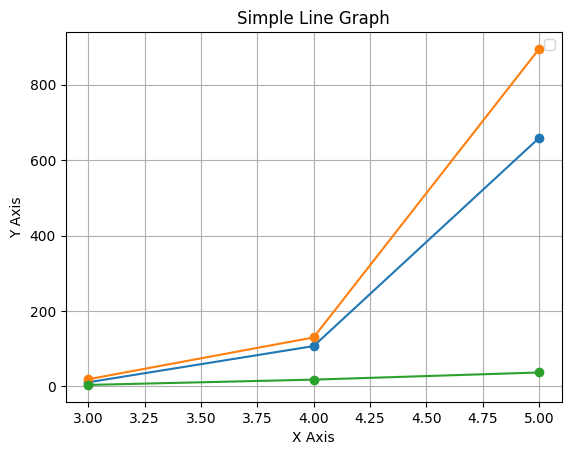

In [ ]:
# Create a line graph
for method in list(total_time.keys()):
    plt.plot(sizes, [i // 1e9 for i in total_time[method]], marker='o', linestyle='-', label='Time ')

# Add title and labels
plt.title('Time taken to generate ')
plt.xlabel('Magic Square Order')
plt.ylabel('Time (s)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

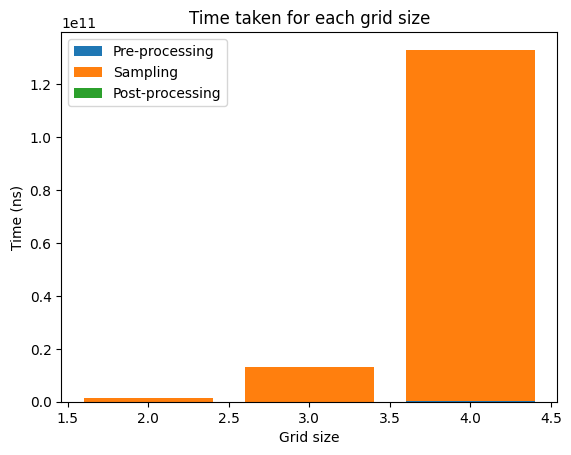

In [6]:
# show a plot of the time taken for each grid size
fig, ax = plt.subplots()
ax.bar(sizes, pre_processing_time, label="Pre-processing")
ax.bar(sizes, sampling_time, bottom=pre_processing_time, label="Sampling")
ax.bar(sizes, post_processing_time, bottom=np.array(pre_processing_time) + np.array(sampling_time), label="Post-processing")
ax.set_xlabel("Grid size")
ax.set_ylabel("Time (ns)")
ax.set_title("Time taken for each grid size")
ax.legend()
plt.show()